In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from WordTokenizer import WordPieceTokenizer


In [3]:
class Word2VecDataset(Dataset):
    def __init__(self,text, WordPieceTokenizer:WordPieceTokenizer,context_size):
        self.tokenizer=WordPieceTokenizer
        self.vocabulary=self.tokenizer.get_vocabulary()
        self.token_word_to_dict={}
        self.context_size=context_size
        for i in range(len(self.vocabulary)):
            self.token_word_to_dict[self.vocabulary[i]]=i
        self.data=self.pre_process_data(text)
    def pre_process_data(self,text_file):
        with open(text_file,"r") as f:
            sentences=[line.strip() for line in f.readlines() if line.strip()]
        data=[]
        for sentence in sentences:
            list_of_tokens_for_sentence=self.tokenizer.tokenize_sentence(sentence)
            for i in range(self.context_size,len(list_of_tokens_for_sentence)-self.context_size):
                list_of_context=[]
                
                for j in range(i-self.context_size,i+self.context_size+1):
                    if j==i:
                        continue
                    list_of_context.append(self.token_word_to_dict[list_of_tokens_for_sentence[j]])

                list_of_context_tensor=torch.tensor(list_of_context, dtype=torch.long)

                target_tensor=torch.tensor(self.token_word_to_dict[list_of_tokens_for_sentence[i]], dtype=torch.long)
                data.append((list_of_context_tensor,target_tensor))
        return data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [4]:
test_class=WordPieceTokenizer("corpus.txt","vocabulary_out.txt","sample_test.json","sentences_to_token_file.json",100000,0)
test_class.construct_vocabulary()

{'i': 3789, 'stand': 10, 'here': 37, 'feel': 1637, 'empty': 9, 'a': 916, 'class': 13, 'post': 14, 'count': 4, 'link': 2, 'href': 25, 'http': 30, 'mooshilu': 1, 'literally': 4, 'just': 226, 'text': 3, 'tychelle': 1, 'to': 1340, 'see': 45, 'if': 134, 'she': 72, 'wants': 7, 'hang': 1, 'out': 113, 'because': 183, 'reading': 13, 'what': 125, 'wrote': 4, 'about': 298, 'my': 642, 'nonexistent': 1, 'social': 7, 'life': 96, 'made': 36, 'me': 382, 'so': 366, 'pathetic': 6, 'really': 157, 'regretful': 6, 'when': 228, 'hearing': 4, 'that': 796, 'shinae': 2, 'got': 41, 'married': 4, 'another': 19, 'man': 13, 'oh': 8, 'it': 515, 's': 82, 'sad': 24, 'hope': 20, 'alex': 1, 'and': 1453, 'can': 136, 'be': 275, 'couple': 13, 'in': 509, 'real': 13, 'they': 109, 're': 21, 'perfect': 9, 'for': 387, 'each': 17, 'other': 47, 'believed': 2, 'was': 339, 'true': 8, 'love': 70, 'devastated': 8, 'wanted': 20, 'settle': 3, 'down': 31, 'have': 302, 'the': 1277, 'whole': 14, 'marriage': 1, 'kids': 16, 'thing': 23, 'w

['##a',
 '##aachan',
 '##ab',
 '##abb',
 '##abbing',
 '##abi',
 '##abl',
 '##ablish',
 '##ably',
 '##abour',
 '##abric',
 '##abulous',
 '##aby',
 '##ac',
 '##acation',
 '##aceful',
 '##ach',
 '##achan',
 '##aching',
 '##aci',
 '##acias',
 '##acifi',
 '##acious',
 '##ack',
 '##acking',
 '##aconic',
 '##acrific',
 '##act',
 '##actic',
 '##acting',
 '##action',
 '##actions',
 '##activ',
 '##actor',
 '##acturing',
 '##aculti',
 '##ad',
 '##adach',
 '##ader',
 '##aders',
 '##adership',
 '##adhan',
 '##adiant',
 '##adiation',
 '##adiator',
 '##adical',
 '##ading',
 '##adings',
 '##adio',
 '##adistic',
 '##adition',
 '##adow',
 '##adphon',
 '##ads',
 '##adual',
 '##aduat',
 '##aduation',
 '##ady',
 '##af',
 '##aff',
 '##affi',
 '##affir',
 '##affirm',
 '##aft',
 '##ag',
 '##agaz',
 '##agg',
 '##agging',
 '##agic',
 '##agious',
 '##agons',
 '##agu',
 '##agulls',
 '##ah',
 '##aha',
 '##ahad',
 '##ahhh',
 '##ahoo',
 '##ai',
 '##aidhair',
 '##aight',
 '##ail',
 '##ailabl',
 '##ailing',
 '##ailorm

In [5]:
dataset = Word2VecDataset("corpus.txt", test_class,2)

train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

Training set size: 29551
Validation set size: 7388


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class Word2VecModel(nn.Module):
    def __init__(self, vocab_size, embedding_dimension):
        super(Word2VecModel, self).__init__()
        self.embedd = nn.Embedding(vocab_size, embedding_dimension)
        self.linear_layer = nn.Linear(embedding_dimension, vocab_size)
        self.to(device)  # Move model to GPU

    def forward(self, context_):
        context_ = context_.to(device)  # Ensure input is on GPU
        embed_temp = self.embedd(context_).mean(dim=1)
        out_put_tex = self.linear_layer(embed_temp)
        return out_put_tex

    def train(self, train_loader, val_loader, epochs, learning_rate,checkpoint_path="Word2VecCheckpoint.pth"):
        loss_func = nn.CrossEntropyLoss()
        opt = optim.Adam(self.parameters(), lr=learning_rate)

        train_loss_history = []
        val_loss_history = []

        for epoch in range(epochs):
            # Training phase
            # self.train()
            train_loss = 0
            for context, target in train_loader:
                context, target = context.to(device), target.to(device)  # Move data to GPU

                self.zero_grad()
                out_temp = self(context)
                loss_temp = loss_func(out_temp, target)
                loss_temp.backward()
                opt.step()
                train_loss += loss_temp.item()
            
            avg_train_loss = train_loss / len(train_loader)
            train_loss_history.append(avg_train_loss)

            # Validation phase
            # self.eval()
            val_loss = 0
            with torch.no_grad():  # No gradient calculation for validation
                for context, target in val_loader:
                    context, target = context.to(device), target.to(device)
                    out_temp = self(context)
                    loss_temp = loss_func(out_temp, target)
                    val_loss += loss_temp.item()
            
            avg_val_loss = val_loss / len(val_loader)
            val_loss_history.append(avg_val_loss)

            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}")

        # Plot training and validation loss
        torch.save({
            'epoch': epochs,
            'model_state_dict': self.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'loss_history': train_loss_history
        }, checkpoint_path)
        print(f"Model checkpoint saved at {checkpoint_path}")
        plt.plot(range(1, epochs + 1), train_loss_history, label="Training Loss")
        plt.plot(range(1, epochs + 1), val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training vs Validation Loss")
        plt.legend()
        plt.show()
    # def load_checkpoint(model, checkpoint_path="word2vec_checkpoint.pth"):
    #     """Load the saved model checkpoint."""
    #     checkpoint = torch.load(checkpoint_path)
    #     model.load_state_dict(checkpoint['model_state_dict'])
    #     print(f"Model loaded from {checkpoint_path}")

    # Example usage

Using device: cuda


In [7]:
vocab_size = len(test_class.get_vocabulary()) # Replace with actual vocabulary size
print(vocab_size)
embedding_dim = 300
model=Word2VecModel(vocab_size,embedding_dim)
print(model)

14297
Word2VecModel(
  (embedd): Embedding(14297, 300)
  (linear_layer): Linear(in_features=300, out_features=14297, bias=True)
)


Epoch 1/10, Training Loss: 7.078621970110642, Validation Loss: 6.810431598068832
Epoch 2/10, Training Loss: 3.9066337780518965, Validation Loss: 8.102138808279326
Epoch 3/10, Training Loss: 2.6893754080260472, Validation Loss: 9.252158619108654
Epoch 4/10, Training Loss: 2.125354718271788, Validation Loss: 10.12961552359841
Epoch 5/10, Training Loss: 1.8811921071567577, Validation Loss: 10.88050400127064
Epoch 6/10, Training Loss: 1.744606200041193, Validation Loss: 11.643528226134064
Epoch 7/10, Training Loss: 1.6599639740599181, Validation Loss: 12.372647027432661
Epoch 8/10, Training Loss: 1.625929894530541, Validation Loss: 13.097900700259519
Epoch 9/10, Training Loss: 1.5770588507835483, Validation Loss: 13.682233269596512
Epoch 10/10, Training Loss: 1.5375421964341687, Validation Loss: 14.40221105303083
Model checkpoint saved at Word2VecCheckpoint.pth


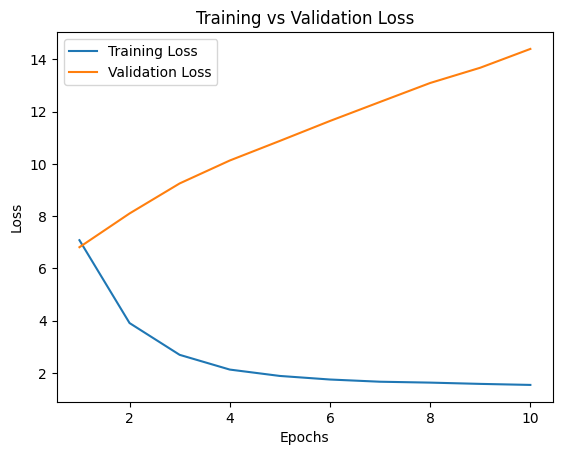

In [8]:
model.train(train_loader,val_loader,10,0.01)